In [33]:
import pandas as pd
import scipy 
import matplotlib
from matplotlib import pyplot as plt
import numpy as np 
import seaborn as sns 
%matplotlib inline
#import warnings
#warnings.filterwarnings('ignore')

In [34]:
data= pd.read_csv("elon_tweets.csv", sep=';')
data

,Unnamed: 0,tweet_id,date,time_recoded,access_point,language,text,mentions,reply_count,retweet_count,like_count,follower_count,friends_count,sentiment_cat,sentiment_val
0,0,1575581872913907712,2022-09-29,20:22:46,Twitter for iPhone,en,@MuskUniversity True,MuskUniversity,377,127,3007,107414837,122,neutral,0.600531
1,1,1575509494510993408,2022-09-29,15:35:09,Twitter for iPhone,en,Needs be able to get from Starbase to South Pa...,_,1604,1416,33556,107414837,122,neutral,0.845257
2,2,1575508878300618752,2022-09-29,15:32:42,Twitter for iPhone,en,@WholeMarsBlog Off-label use 🤣,WholeMarsBlog,754,492,23482,107414837,122,neutral,0.753030
3,3,1575508498430820352,2022-09-29,15:31:12,Twitter for iPhone,en,Cybertruck will be waterproof enough to serve ...,_,12870,9732,124276,107414837,122,positive,0.611826
4,4,1575507735298207744,2022-09-29,15:28:10,Twitter for iPhone,en,@phibetakitten Submarines use electric motors ...,phibetakitten,509,347,8189,107414837,122,neutral,0.859709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18330,18330,1586057952678465537,2022-10-28,18:10:58,Twitter for iPhone,qam,@slashdot !,slashdot,1548,1611,31787,115238579,130,neutral,0.628496
18331,18331,1586057687782998017,2022-10-28,18:09:54,Twitter for iPhone,en,@skorusARK Cool!,skorusARK,1041,593,21339,115238579,130,positive,0.932170
18332,18332,1585981766229143552,2022-10-28,13:08:13,Twitter for iPhone,en,@WeAreCanProud First I’ve heard,WeAreCanProud,3213,3846,77864,115238579,130,neutral,0.758104
18333,18333,1585966869122457600,2022-10-28,12:09:02,Twitter for iPhone,en,🎶 let the good times roll 🎶,_,48131,94751,999337,115238579,130,positive,0.886272


In [35]:
data.drop(columns='Unnamed: 0', inplace=True)

In [36]:
data.set_index('tweet_id', inplace=True)

In [37]:
data.sort_values('date', ascending=False)

,date,time_recoded,access_point,language,text,mentions,reply_count,retweet_count,like_count,follower_count,friends_count,sentiment_cat,sentiment_val
tweet_id,,,,,,,,,,,,,
1590519242805641216,2022-11-10,01:38:32,Twitter for iPhone,en,"@micsolana In days to come, we’ll add granular...",micsolana,348,133,1557,115241851,130,neutral,0.730545
1590505894210834434,2022-11-10,00:45:30,Twitter for iPhone,en,@micsolana We are changing the text to say “Le...,micsolana,1224,598,9464,115241851,130,neutral,0.587615
1590391902662455296,2022-11-09,17:12:32,Twitter for iPhone,en,@SciGuySpace Finally,SciGuySpace,464,275,7223,115241851,130,neutral,0.496665
1590398147968520192,2022-11-09,17:37:21,Twitter for iPhone,en,@lawrencekitema @SpaceNews_Inc Congratulations!,"lawrencekitema,SpaceNews_Inc",178,167,3831,115241851,130,positive,0.981080
1590392135395979265,2022-11-09,17:13:27,Twitter for iPhone,en,@SpaceNews_Inc Rockets that aren’t reusable ha...,SpaceNews_Inc,1756,1274,22648,115241851,130,negative,0.676390
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142881284019060736,2011-12-03,08:22:07,Twitter for iPhone,en,That was a total non sequitur btw,_,27,9,50,107415763,122,negative,0.506732
142880871391838208,2011-12-03,08:20:28,Twitter for iPhone,en,"Great Voltaire quote, arguably better than Twa...",_,23,29,50,107415763,122,positive,0.558608
142179928203460608,2011-12-01,09:55:11,Twitter Web Client,en,Went to Iceland on Sat to ride bumper cars on ...,_,33,22,189,107415714,122,positive,0.973320


In [38]:
corr_num=data.corr()
corr_num

C:\Users\theya\AppData\Local\Temp\ipykernel_3656\963562844.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_num=data.corr()


,reply_count,retweet_count,like_count,follower_count,friends_count,sentiment_val
reply_count,1.000000,0.731378,0.812238,0.184486,0.180346,-0.010279
retweet_count,0.731378,1.000000,0.920335,0.084760,0.090934,-0.017313
like_count,0.812238,0.920335,1.000000,0.134076,0.142448,-0.018899
follower_count,0.184486,0.084760,0.134076,1.000000,0.889305,-0.041047
friends_count,0.180346,0.090934,0.142448,0.889305,1.000000,-0.031335
sentiment_val,-0.010279,-0.017313,-0.018899,-0.041047,-0.031335,1.000000


<Axes: >

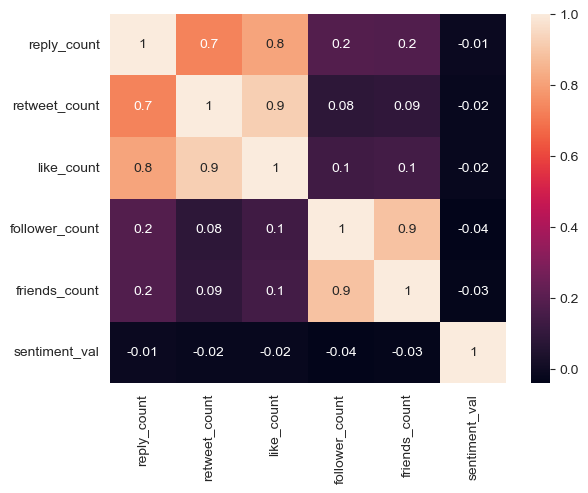

In [39]:
sns.heatmap(corr_num, annot=True, fmt='.1g',)

In [40]:
# b=pd.DataFrame(data['date'].value_counts()).reset_index()
# b.columns=["date", "tweet_count"]
# bc= b.sort_values("date")
# bc

In [41]:
# #plt.plot(x=bc['date'], y = bc["tweet_count"])
# plt.plot(bc['date'],bc["tweet_count"])
# plt.xlabel="Date"
# plt.ylabel="Number of tweets"
# plt.show()

In [42]:
data

,date,time_recoded,access_point,language,text,mentions,reply_count,retweet_count,like_count,follower_count,friends_count,sentiment_cat,sentiment_val
tweet_id,,,,,,,,,,,,,
1575581872913907712,2022-09-29,20:22:46,Twitter for iPhone,en,@MuskUniversity True,MuskUniversity,377,127,3007,107414837,122,neutral,0.600531
1575509494510993408,2022-09-29,15:35:09,Twitter for iPhone,en,Needs be able to get from Starbase to South Pa...,_,1604,1416,33556,107414837,122,neutral,0.845257
1575508878300618752,2022-09-29,15:32:42,Twitter for iPhone,en,@WholeMarsBlog Off-label use 🤣,WholeMarsBlog,754,492,23482,107414837,122,neutral,0.753030
1575508498430820352,2022-09-29,15:31:12,Twitter for iPhone,en,Cybertruck will be waterproof enough to serve ...,_,12870,9732,124276,107414837,122,positive,0.611826
1575507735298207744,2022-09-29,15:28:10,Twitter for iPhone,en,@phibetakitten Submarines use electric motors ...,phibetakitten,509,347,8189,107414837,122,neutral,0.859709
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586057952678465537,2022-10-28,18:10:58,Twitter for iPhone,qam,@slashdot !,slashdot,1548,1611,31787,115238579,130,neutral,0.628496
1586057687782998017,2022-10-28,18:09:54,Twitter for iPhone,en,@skorusARK Cool!,skorusARK,1041,593,21339,115238579,130,positive,0.932170
1585981766229143552,2022-10-28,13:08:13,Twitter for iPhone,en,@WeAreCanProud First I’ve heard,WeAreCanProud,3213,3846,77864,115238579,130,neutral,0.758104


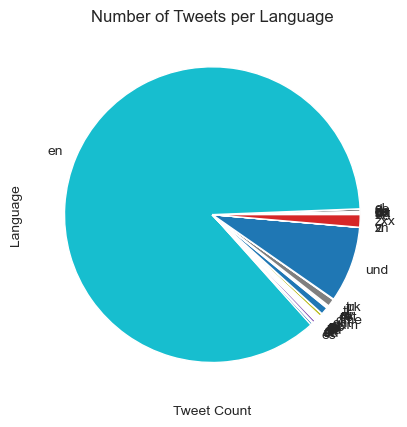

In [43]:
# group the data by language and count the number of tweets per language
language_counts = data.groupby('language')['text'].count()

# create a horizontal bar chart
language_counts.plot(kind='pie')
plt.xlabel('Tweet Count')
plt.ylabel('Language')
plt.title('Number of Tweets per Language')
plt.show()


In [44]:
# # resample to daily frequency and count tweets
# daily_tweet_count = data['tweet_id'].resample('D').count()

# # plot the time series chart
# plt.plot(daily_tweet_count)
# plt.xlabel('Date')
# plt.ylabel('Tweet Count')
# plt.title('Daily Tweet Activity')
# plt.show()


1. Scatter plot: A scatter plot could be used to show the relationship between two variables, such as the number of retweets and likes for each tweet.

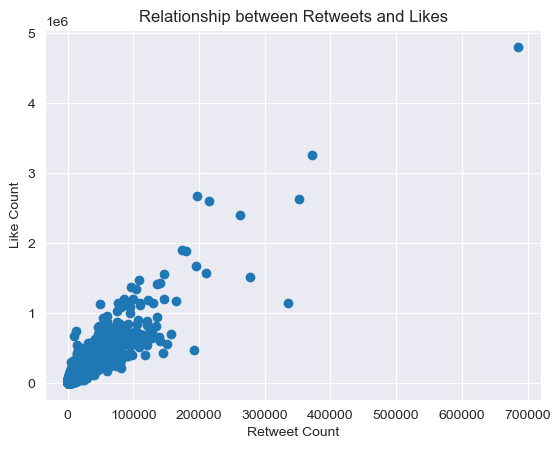

In [45]:
plt.scatter(data['retweet_count'], data['like_count'])
plt.xlabel('Retweet Count')
plt.ylabel('Like Count')
plt.title('Relationship between Retweets and Likes')
plt.show()


Bar chart: A bar chart could be used to show the number of tweets per sentiment category.

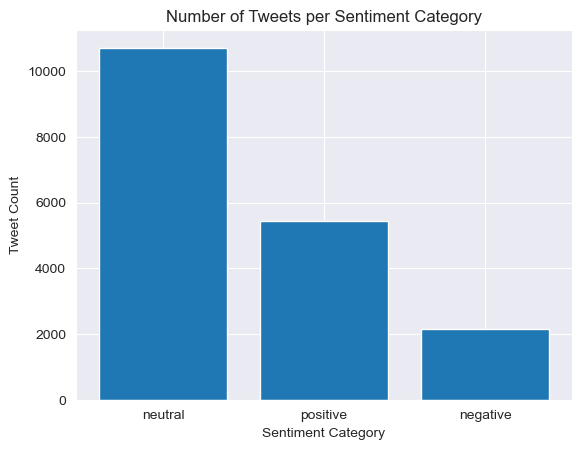

In [46]:
sentiment_counts = data['sentiment_cat'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment Category')
plt.ylabel('Tweet Count')
plt.title('Number of Tweets per Sentiment Category')
plt.show()


Line chart: A line chart could be used to show the change in tweet count over time.

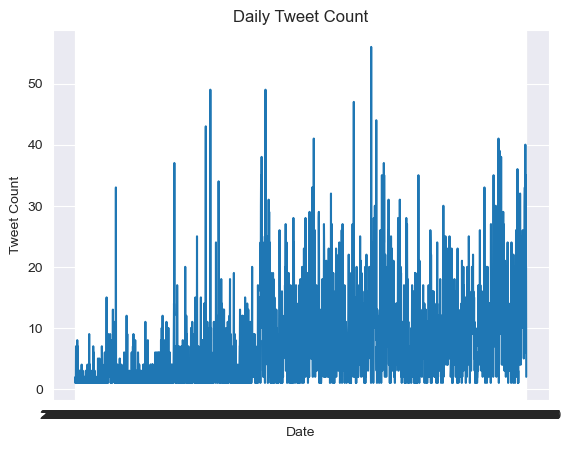

In [47]:
daily_tweet_count = data.groupby('date')['text'].count()

plt.plot(daily_tweet_count.index, daily_tweet_count.values)
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.title('Daily Tweet Count')
plt.show()


Stacked bar chart: A stacked bar chart could be used to show the number of tweets per sentiment category for each language.

Histogram: A histogram could be used to show the distribution of tweet sentiment values.


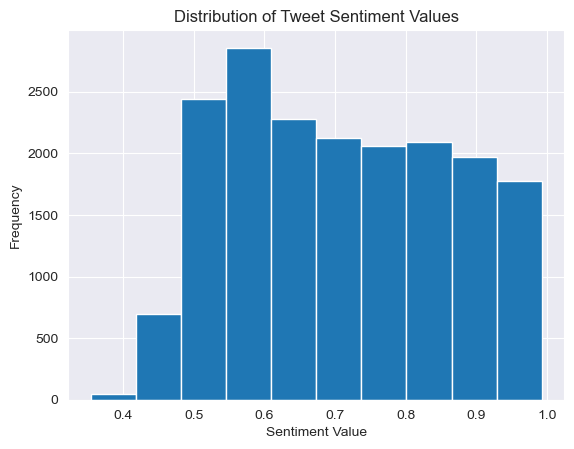

In [48]:
plt.hist(data['sentiment_val'], bins=10)
plt.xlabel('Sentiment Value')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Sentiment Values')
plt.show()

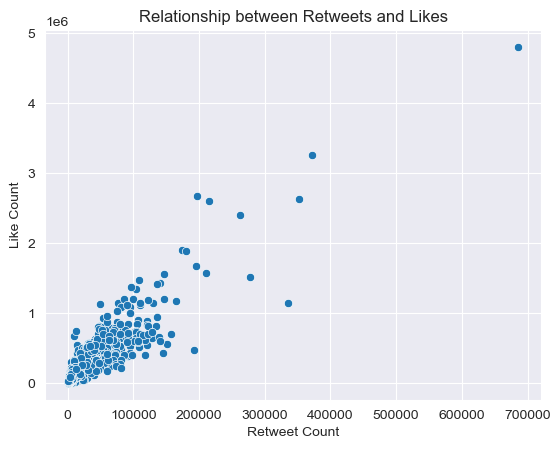

In [49]:
sns.scatterplot(x='retweet_count', y='like_count', data=data)
sns.set_style('darkgrid')
plt.xlabel('Retweet Count')
plt.ylabel('Like Count')
plt.title('Relationship between Retweets and Likes')
plt.show()


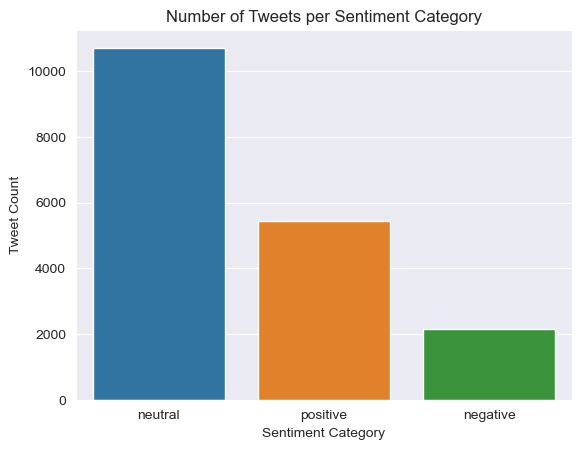

In [50]:
sns.countplot(x='sentiment_cat', data=data)
sns.set_style('darkgrid')
plt.xlabel('Sentiment Category')
plt.ylabel('Tweet Count')
plt.title('Number of Tweets per Sentiment Category')
plt.show()


In [ ]:
sns.countplot(x='sentiment_cat', data=data)
sns.set_style('darkgrid')
plt.xlabel('Sentiment Category')
plt.ylabel('Tweet Count')
plt.title('Number of Tweets per Sentiment Category')
plt.show()


# create a horizontal bar chart
language_counts.plot(kind='pie')
plt.xlabel('Tweet Count')
plt.ylabel('Language')
plt.title('Number of Tweets per Language')
plt.show()

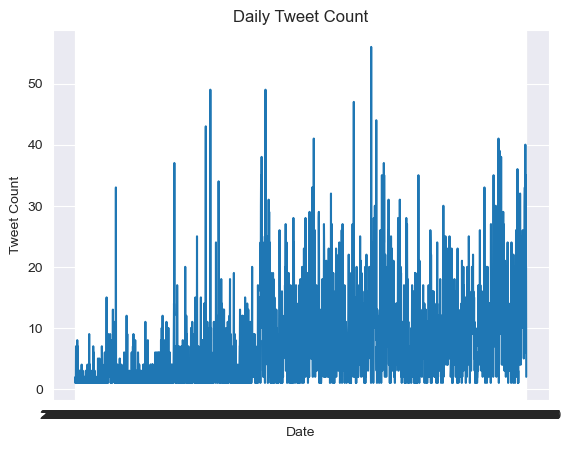

In [51]:
sns.lineplot(x='date', y='text', data=data.groupby('date')['text'].count().reset_index())
sns.set_style('darkgrid')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.title('Daily Tweet Count')
plt.show()


C:\Users\theya\AppData\Local\Temp\ipykernel_3656\762790449.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='language', y='text', hue='sentiment_cat', data=language_sentiment_counts, kind='bar', ci=None)


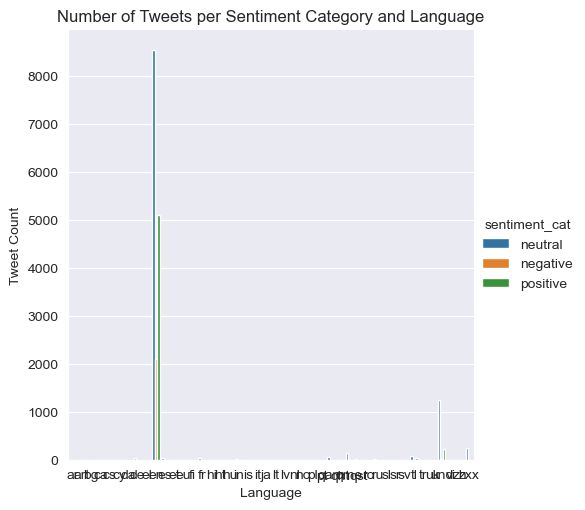

In [52]:
import seaborn as sns

language_sentiment_counts = data.groupby(['language', 'sentiment_cat'])['text'].count().reset_index()

sns.catplot(x='language', y='text', hue='sentiment_cat', data=language_sentiment_counts, kind='bar', ci=None)
sns.set_style('darkgrid')
plt.xlabel('Language')
plt.ylabel('Tweet Count')
plt.title('Number of Tweets per Sentiment Category and Language')
plt.show()


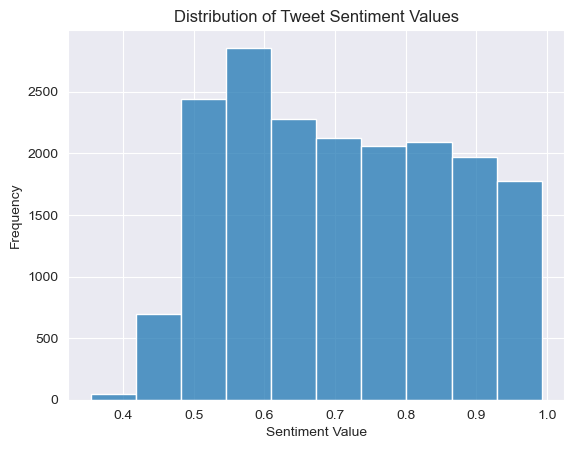

In [53]:
import seaborn as sns

sns.histplot(data=data, x='sentiment_val', bins=10)
sns.set_style('darkgrid')
plt.xlabel('Sentiment Value')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Sentiment Values')
plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


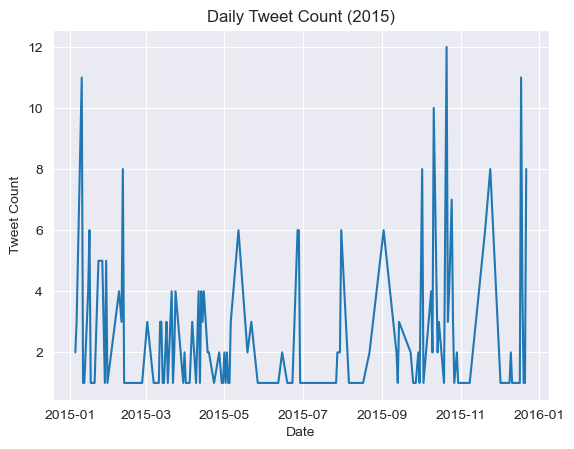

In [54]:
# convert the date column to a datetime object
data['date'] = pd.to_datetime(data['date'])

# create a figure and axis object
fig, ax = plt.subplots()

# function to update the plot with each animation frame
def update(year):
    # filter the data for the given year
    year_data = data[data['date'].dt.year == year]

    # count the number of tweets per day for the given year
    daily_tweet_count = year_data.groupby('date')['text'].count()

    # update the axis labels and title
    ax.clear()
    ax.set_xlabel('Date')
    ax.set_ylabel('Tweet Count')
    ax.set_title('Daily Tweet Count ({})'.format(year))

    # plot the tweet count over time for the given year
    sns.lineplot(ax=ax, x=daily_tweet_count.index, y=daily_tweet_count.values)

# create the animation object and save the animation as a GIF file
anim = FuncAnimation(fig, update, frames=range(2015, 2023), interval=1000)
anim.save('tweet_count_animation1.gif', writer='imagemagick')


In [55]:
# convert the date column to a datetime object
data['date'] = pd.to_datetime(data['date'])

# group the data by year and count the number of tweets per year
yearly_tweet_count = data.groupby(data['date'].dt.year)['text'].count()

# create the line plot using seaborn and matplotlib
sns.bar(x=yearly_tweet_count.index, y=yearly_tweet_count.values)
plt.title('Total Number of Tweets per Year')
plt.xlabel('Year')
plt.ylabel('Tweet Count')
plt.show()


AttributeError: module 'seaborn' has no attribute 'bar'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# convert the date column to a datetime object
data['date'] = pd.to_datetime(data['date'])

# create a figure and axis object
fig, ax = plt.subplots()

# function to update the plot with each animation frame
def update(year):
    # filter the data for the given year
    year_data = data[data['date'].dt.year == year]

    # count the number of tweets for the given year
    tweet_count = len(year_data)

    # update the axis labels and title
    ax.clear()
    ax.set_xlabel('Year')
    ax.set_ylabel('Tweet Count')
    ax.set_title('Total Number of Tweets ({})'.format(year))

    # plot the tweet count for the given year as a bar
    sns.barplot(ax=ax, x=[year], y=[tweet_count], color='blue')

# create the animation object and save the animation as a GIF file
anim = FuncAnimation(fig, update, frames=range(2015, 2023), interval=1000)
anim.save('tweet_count_animation2.gif', writer='imagemagick')


In [ ]:

# convert the date column to a datetime object
data['date'] = pd.to_datetime(data['date'])

# get the maximum tweet count across all years
max_tweet_count = data.groupby(data['date'].dt.year)['text'].count().max()

# create a figure and axis object
fig, ax = plt.subplots()

# function to update the plot with each animation frame
def update(year):
    # filter the data for the given year
    year_data = data[data['date'].dt.year == year]

    # count the number of tweets for the given year
    tweet_count = len(year_data)

    # update the axis labels and title
    ax.clear()
    ax.set_xlabel('Year')
    ax.set_ylabel('Tweet Count')
    ax.set_ylim([0, max_tweet_count])
    ax.set_title('Total Number of Tweets ({})'.format(year))

    # plot the tweet count for the given year as a bar
    sns.barplot(ax=ax, x=[year], y=[tweet_count], color='blue')

# create the animation object and save the animation as a GIF file
anim = FuncAnimation(fig, update, frames=range(2015, 2023), interval=1000)
anim.save('tweet_count_animation3.gif', writer='imagemagick')


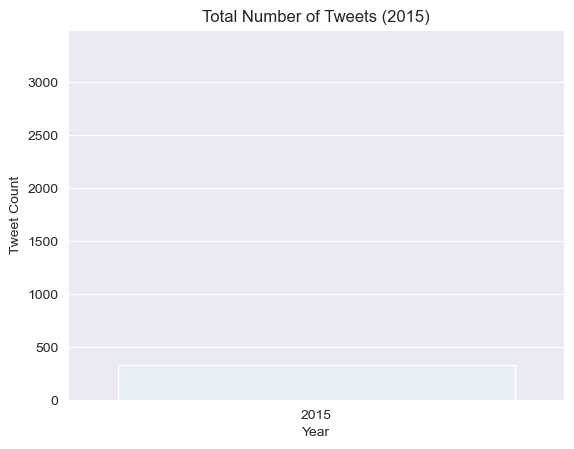

In [ ]:
# convert the date column to a datetime object
data['date'] = pd.to_datetime(data['date'])

# get the maximum tweet count across all years
max_tweet_count = data.groupby(data['date'].dt.year)['text'].count().max()

# create a colormap object
cmap = plt.cm.Blues

# create a figure and axis object
fig, ax = plt.subplots()

# function to update the plot with each animation frame
def update(year):
    # filter the data for the given year
    year_data = data[data['date'].dt.year == year]

    # count the number of tweets for the given year
    tweet_count = len(year_data)

    # calculate the color for the bar based on the tweet count
    color = cmap(tweet_count / max_tweet_count)

    # update the axis labels and title
    ax.clear()
    ax.set_xlabel('Year')
    ax.set_ylabel('Tweet Count')
    ax.set_ylim([0, max_tweet_count])
    ax.set_title('Total Number of Tweets ({})'.format(year))

    # plot the tweet count for the given year as a bar
    sns.barplot(ax=ax, x=[year], y=[tweet_count], color=color)

# create the animation object and save the animation as a GIF file
anim = FuncAnimation(fig, update, frames=range(2015, 2023), interval=1000)
anim.save('tweet_count_animation4.gif', writer='imagemagick')


MovieWriter imagemagick unavailable; using Pillow instead.


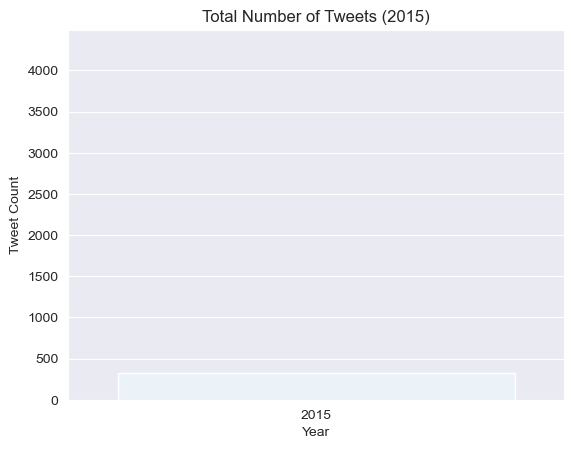

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# convert the date column to a datetime object
data['date'] = pd.to_datetime(data['date'])

# get the maximum tweet count across all years
max_tweet_count = data.groupby(data['date'].dt.year)['text'].count().max() + 1000  # add 1000 to the maximum value

# create a colormap object
cmap = plt.cm.Blues

# create a figure and axis object
fig, ax = plt.subplots()

# function to update the plot with each animation frame
def update(year):
    # filter the data for the given year
    year_data = data[data['date'].dt.year == year]

    # count the number of tweets for the given year
    tweet_count = len(year_data)

    # calculate the color for the bar based on the tweet count
    color = cmap(tweet_count / max_tweet_count)

    # update the axis labels and title
    ax.clear()
    ax.set_xlabel('Year')
    ax.set_ylabel('Tweet Count')
    ax.set_ylim([0, max_tweet_count])
    ax.set_title('Total Number of Tweets ({})'.format(year))

    # plot the tweet count for the given year as a bar
    sns.barplot(ax=ax, x=[year], y=[tweet_count], color=color)

# create the animation object and save the animation as a GIF file
anim = FuncAnimation(fig, update, frames=range(2015, 2023), interval=1000)
anim.save('tweet_count_animation5.gif', writer='imagemagick')


IndexError: index 3 is out of bounds for axis 0 with size 3

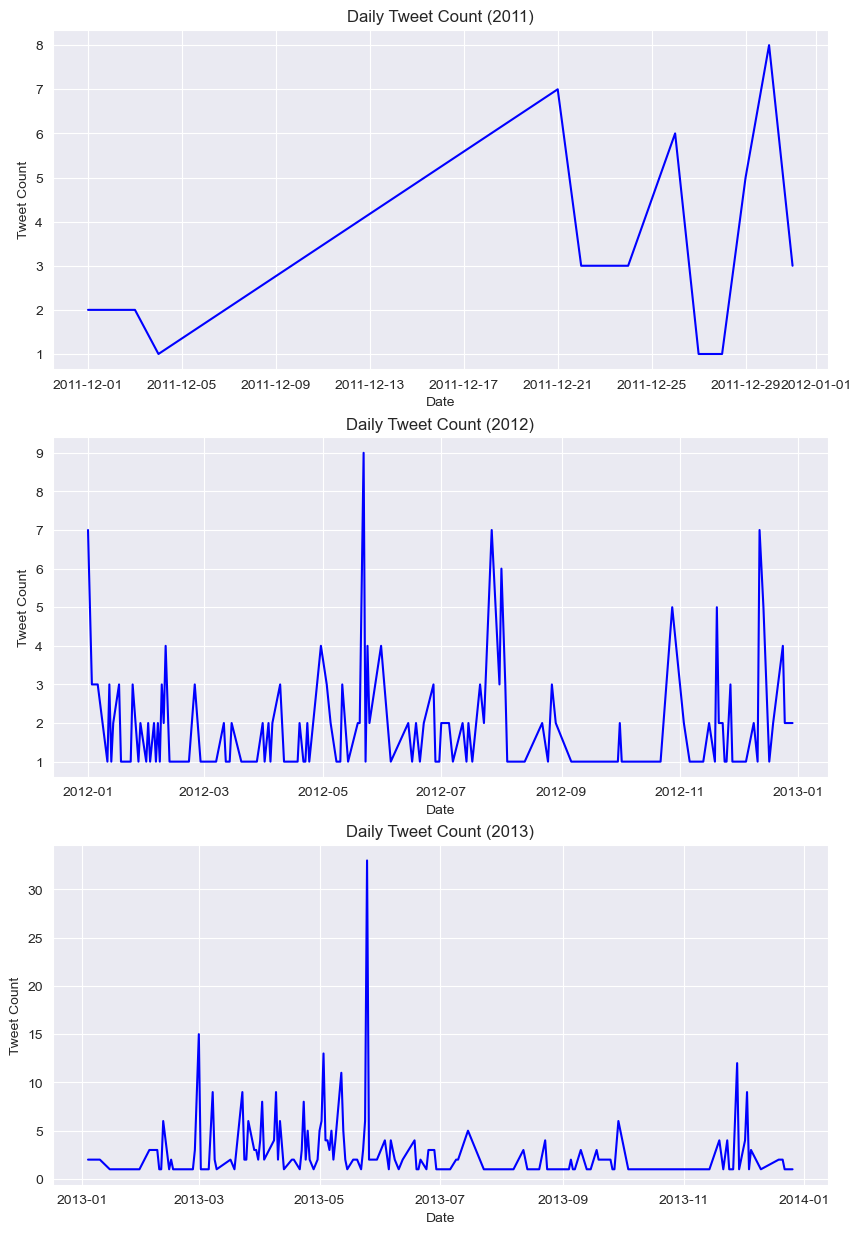

In [59]:
da
    

In [61]:
data["date"].sort_values()

tweet_id
15434727182           2010-06-04
142179928203460608    2011-12-01
142188458125963264    2011-12-01
142880871391838208    2011-12-03
142881284019060736    2011-12-03
                         ...    
1590403181624066049   2022-11-09
1590383937284870145   2022-11-09
1590398147968520192   2022-11-09
1590505894210834434   2022-11-10
1590519242805641216   2022-11-10
Name: date, Length: 18335, dtype: datetime64[ns]

## CLEAN BREAKDOWN OF TWEETS PER YEAR

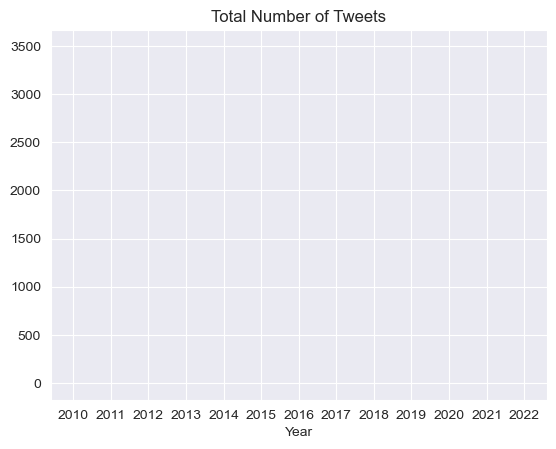

In [64]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # read in the CSV file
# # data = pd.read_csv('elon_tweets.csv', index_col='tweet_id')

# # convert the date column to a datetime object
# data['date'] = pd.to_datetime(data['date'])

# group the data by year and count the number of tweets for each year
yearly_tweet_counts = data.groupby(data['date'].dt.year)['text'].count()

# create a colormap object
cmap = plt.cm.Blues

# create a figure and axis object
fig, ax = plt.subplots()

# set the x-axis ticks to show years from 2010 to 2023
ax.set_xticks(range(2010, 2024))

# set the x-axis label and title
ax.set_xlabel('Year')
ax.set_title('Total Number of Tweets')

# loop through each year and plot the corresponding tweet count as a line
for year in range(2010, 2024):
    # check if the current year has any tweets
    if year in yearly_tweet_counts.index:
        # get the tweet count for the current year
        tweet_count = yearly_tweet_counts[year]
        
        # calculate the color for the line based on the tweet count
        color = cmap(tweet_count / yearly_tweet_counts.max())
        
        # plot the tweet count for the current year as a line
        sns.lineplot(ax=ax, x=[year], y=[tweet_count], color=color)
    
plt.show()


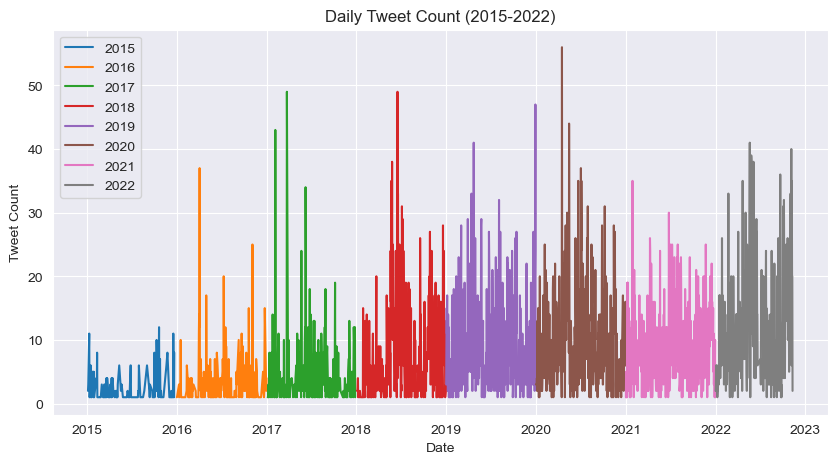

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# # read in the CSV file
# data = pd.read_csv('tweet_data.csv', index_col='tweet_id')

# convert the date column to a datetime object
data['date'] = pd.to_datetime(data['date'])

# set the figure size
plt.figure(figsize=(10, 5))

# loop over the years and create a line chart for each year
for year in range(2015, 2023):
    # filter the data for the given year
    year_data = data[data['date'].dt.year == year]

    # count the number of tweets per day for the given year
    daily_tweet_count = year_data.groupby('date')['text'].count()

    # plot the tweet count over time for the given year
    sns.lineplot(x=daily_tweet_count.index, y=daily_tweet_count.values, label=year)

# set the axis labels and title
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.title('Daily Tweet Count (2015-2022)')

# display the legend
plt.legend()

# show the plot
plt.show()


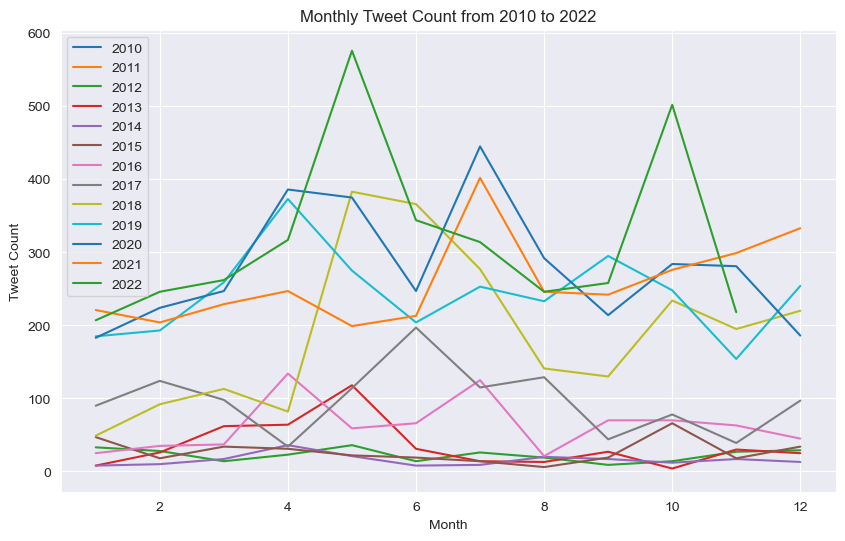

In [67]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # read in the CSV file
# data = pd.read_csv('tweet_data.csv', index_col='tweet_id')

# convert the date column to a datetime object
data['date'] = pd.to_datetime(data['date'])

# create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# iterate over years from 2010 to 2022
for year in range(2010, 2023):
    # filter the data for the given year
    year_data = data[data['date'].dt.year == year]

    # group the data by month and count the number of tweets
    monthly_tweet_count = year_data.groupby(data['date'].dt.month)['text'].count()

    # plot the tweet count over time for the given year
    sns.lineplot(ax=ax, x=monthly_tweet_count.index, y=monthly_tweet_count.values, label=year)

# update the axis labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Tweet Count')
ax.set_title('Monthly Tweet Count from 2010 to 2022')

# add a legend to the plot
plt.legend()

# display the plot
plt.show()


IndexError: index 3 is out of bounds for axis 0 with size 3

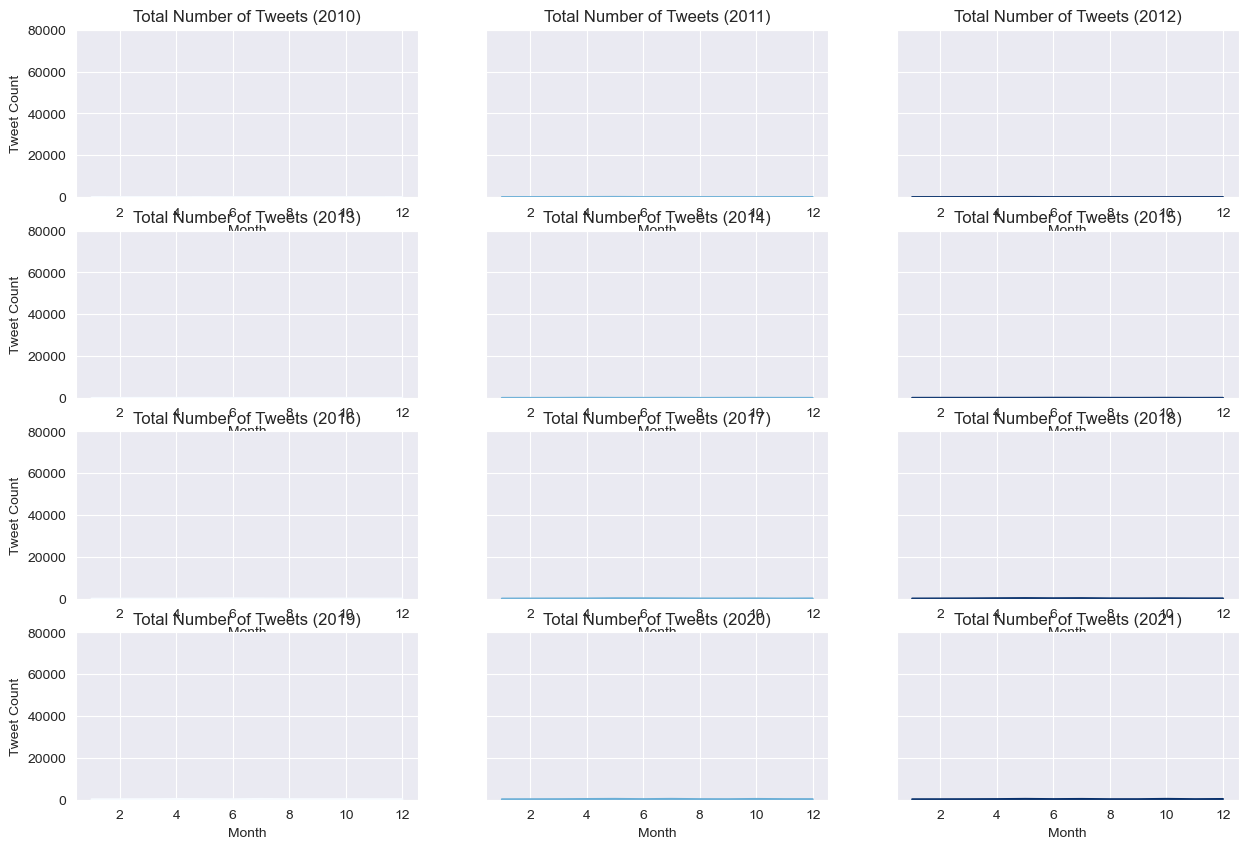

In [69]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # read in the CSV file
# data = pd.read_csv('tweet_data.csv', index_col='tweet_id')

# convert the date column to a datetime object
data['date'] = pd.to_datetime(data['date'])

# create a colormap object
cmap = plt.cm.Blues

# define the groups of years
year_groups = [[2010, 2011, 2012], [2013, 2014, 2015], [2016, 2017, 2018], [2019, 2020, 2021, 2022]]

# create a figure and axis objects
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 10), sharey=True)

# loop through the groups of years and plot the line charts
for i, years in enumerate(year_groups):
    for j, year in enumerate(years):
        # filter the data for the given year range
        year_data = data[(data['date'].dt.year >= year) & (data['date'].dt.year < year + 3)]

        # group the data by month and year and count the number of tweets
        tweet_count = year_data.groupby([year_data['date'].dt.year, year_data['date'].dt.month]).size()

        # create a dataframe from the tweet count
        tweet_count = pd.DataFrame({'Month': tweet_count.index.get_level_values(1), 'Tweet Count': tweet_count.values})

        # calculate the color for the line based on the tweet count
        color = cmap(j / 2)

        # plot the line chart
        sns.lineplot(ax=axs[i][j], x='Month', y='Tweet Count', data=tweet_count, color=color)
        axs[i][j].set_xlabel('Month')
        axs[i][j].set_ylabel('Tweet Count')
        axs[i][j].set_title('Total Number of Tweets ({})'.format(year))
        axs[i][j].set_ylim([0, 80000])

# adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.5)

# show the plot
plt.show()
